In [1]:
from Bio import SeqIO
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
gb1_ref_seq_file = "../../data/FLIP/gb1/5LDE_1.fasta"
gb1_full_data_file = "../../data/FLIP/gb1/four_mutations_full_data.csv"
gb1_split_data_one_vs_many_file = "../../data/FLIP/gb1/splits/one_vs_rest.csv"
gb1_split_data_two_vs_many_file = "../../data/FLIP/gb1/splits/two_vs_rest.csv"
gb1_split_data_three_vs_many_file = "../../data/FLIP/gb1/splits/three_vs_rest.csv"
gb1_split_data_low_vs_high_file = "../../data/FLIP/gb1/splits/low_vs_high.csv"
gb1_split_data_sampled_file = "../../data/FLIP/gb1/splits/sampled.csv"
gb1_region = (2,56)

gb1_reference_seq = """
MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYDDATKTFTVTELEVLFQGPLDPNSM
ATYEVLCEVARKLGTDDREVVLFLLNVFIPQPTLAQLIGALRALKEEGRLTFPLLAECLFRAGRRDLLRD
LLHLDPRFLERHLAGTMSYFSPYQLTVLHVDGELCARDIRSLIFLSKDTIGSRSTPQTFLHWVYCMENLD
LLGPTDVDALMSMLRSLSRVDLQRQVQTLMGLHLSGPSHSQHYRHTPLEHHHHHH
""".replace("\n", "")

### Full data

In [3]:
df_gb1_full_data = pd.read_csv(gb1_full_data_file)
print(df_gb1_full_data.info())
df_gb1_full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149361 entries, 0 to 149360
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Variants                  149361 non-null  object 
 1   HD                        149361 non-null  int64  
 2   Count input               149361 non-null  int64  
 3   Count selected            149361 non-null  int64  
 4   Fitness                   149361 non-null  float64
 5   sequence                  149361 non-null  object 
 6   keep                      149361 non-null  bool   
 7   one_vs_rest               8733 non-null    object 
 8   one_vs_rest_validation    3 non-null       object 
 9   two_vs_rest               8733 non-null    object 
 10  two_vs_rest_validation    43 non-null      object 
 11  three_vs_rest             8733 non-null    object 
 12  three_vs_rest_validation  299 non-null     object 
 13  sampled                   8733 non-null    o

,Variants,HD,Count input,Count selected,Fitness,sequence,keep,one_vs_rest,one_vs_rest_validation,two_vs_rest,two_vs_rest_validation,three_vs_rest,three_vs_rest_validation,sampled,sampled_validation,low_vs_high,low_vs_high_validation
0,VDGV,0,92735,338346,1.000000,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,True,train,NaN,train,NaN,train,NaN,train,NaN,test,NaN
1,ADGV,1,34,43,0.061910,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGADGEWTYD...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CDGV,1,850,641,0.242237,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGCDGEWTYD...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DDGV,1,63,63,0.006472,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGDDGEWTYD...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,EDGV,1,841,190,0.032719,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGEDGEWTYD...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
for split in ['one_vs_rest', 'two_vs_rest', 'three_vs_rest', 'low_vs_high', 'sampled']:
    num_val = df_gb1_full_data[split + '_validation'].sum()
    num_train = df_gb1_full_data[split].value_counts()['train'] - num_val
    num_test = df_gb1_full_data[split].value_counts()['test']
    num_all = num_train + num_val + num_test
    print(split, num_all, num_train, num_val, num_test)

one_vs_rest 8733 25 3 8705
two_vs_rest 8733 381 43 8309
three_vs_rest 8733 2691 299 5743
low_vs_high 8733 4580 509 3644
sampled 8733 6289 699 1745


In [5]:
df_keep = df_gb1_full_data[df_gb1_full_data['keep']]

In [6]:
df_keep['HD'].value_counts()

4    5743
3    2566
2     396
1      27
0       1
Name: HD, dtype: int64

<Axes: >

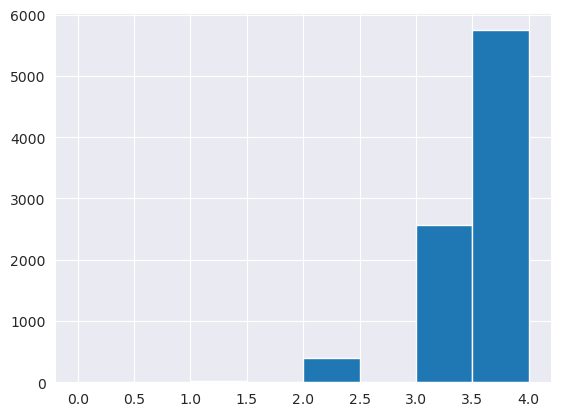

In [7]:
df_keep['HD'].hist(bins=8)

### one-vs-many

In [8]:
df_gb1_split_data_one_vs_many = pd.read_csv(gb1_split_data_one_vs_many_file)
print(df_gb1_split_data_one_vs_many.info())
df_gb1_split_data_one_vs_many.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sequence    8733 non-null   object 
 1   target      8733 non-null   float64
 2   set         8733 non-null   object 
 3   validation  3 non-null      object 
dtypes: float64(1), object(3)
memory usage: 273.0+ KB
None


,sequence,target,set,validation
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.000000,train,NaN
1,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...,1.445905,train,NaN
2,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...,1.690164,train,NaN
3,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...,1.170550,train,NaN
4,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...,2.401243,train,NaN


In [9]:
num_val = df_gb1_split_data_one_vs_many['validation'].sum()
num_train = df_gb1_split_data_one_vs_many.set.value_counts()['train'] - num_val
num_test = df_gb1_split_data_one_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('one-many', num_all, num_train, num_val, num_test)

one-many 8733 25 3 8705


### two-vs-many

In [10]:
df_gb1_split_data_two_vs_many = pd.read_csv(gb1_split_data_two_vs_many_file)
print(df_gb1_split_data_two_vs_many.info())
df_gb1_split_data_two_vs_many.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sequence    8733 non-null   object 
 1   target      8733 non-null   float64
 2   set         8733 non-null   object 
 3   validation  43 non-null     object 
dtypes: float64(1), object(3)
memory usage: 273.0+ KB
None


,sequence,target,set,validation
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.000000,train,NaN
1,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...,1.445905,train,NaN
2,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...,1.690164,train,NaN
3,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...,1.170550,train,NaN
4,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...,2.401243,train,NaN


In [11]:
num_val = df_gb1_split_data_two_vs_many['validation'].sum()
num_train = df_gb1_split_data_two_vs_many.set.value_counts()['train'] - num_val
num_test = df_gb1_split_data_two_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('two-many', num_all, num_train, num_val, num_test)

two-many 8733 381 43 8309


### three-vs-many

In [12]:
df_gb1_split_data_three_vs_many = pd.read_csv(gb1_split_data_three_vs_many_file)
print(df_gb1_split_data_three_vs_many.info())
df_gb1_split_data_three_vs_many.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sequence    8733 non-null   object 
 1   target      8733 non-null   float64
 2   set         8733 non-null   object 
 3   validation  299 non-null    object 
dtypes: float64(1), object(3)
memory usage: 273.0+ KB
None


,sequence,target,set,validation
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.000000,train,NaN
1,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...,1.445905,train,NaN
2,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...,1.690164,train,NaN
3,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...,1.170550,train,NaN
4,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...,2.401243,train,NaN


In [13]:
num_val = df_gb1_split_data_three_vs_many['validation'].sum()
num_train = df_gb1_split_data_three_vs_many.set.value_counts()['train'] - num_val
num_test = df_gb1_split_data_three_vs_many.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('three-many', num_all, num_train, num_val, num_test)

three-many 8733 2691 299 5743


### low-vs-high

In [14]:
df_gb1_split_data_low_vs_high = pd.read_csv(gb1_split_data_low_vs_high_file)
print(df_gb1_split_data_low_vs_high.info())
df_gb1_split_data_low_vs_high.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sequence    8733 non-null   object 
 1   target      8733 non-null   float64
 2   set         8733 non-null   object 
 3   validation  509 non-null    object 
dtypes: float64(1), object(3)
memory usage: 273.0+ KB
None


,sequence,target,set,validation
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.000000,test,NaN
1,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...,1.445905,test,NaN
2,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...,1.690164,test,NaN
3,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...,1.170550,test,NaN
4,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...,2.401243,test,NaN


In [15]:
num_val = df_gb1_split_data_low_vs_high['validation'].sum()
num_train = df_gb1_split_data_low_vs_high.set.value_counts()['train'] - num_val
num_test = df_gb1_split_data_low_vs_high.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('low-high', num_all, num_train, num_val, num_test)

low-high 8733 4580 509 3644


### sampled

In [16]:
df_gb1_split_data_sampled = pd.read_csv(gb1_split_data_sampled_file)
print(df_gb1_split_data_sampled.info())
df_gb1_split_data_sampled.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8733 entries, 0 to 8732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sequence    8733 non-null   object 
 1   target      8733 non-null   float64
 2   set         8733 non-null   object 
 3   validation  699 non-null    object 
dtypes: float64(1), object(3)
memory usage: 273.0+ KB
None


,sequence,target,set,validation
0,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVDGEWTYD...,1.000000,train,NaN
1,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGIDGEWTYD...,1.445905,train,True
2,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGLDGEWTYD...,1.690164,test,NaN
3,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGMDGEWTYD...,1.170550,train,True
4,MQYKLILNGKTLKGETTTEAVDAATAEKVFKQYANDNGVAGEWTYD...,2.401243,train,NaN


In [17]:
num_val = df_gb1_split_data_sampled['validation'].sum()
num_train = df_gb1_split_data_sampled.set.value_counts()['train'] - num_val
num_test = df_gb1_split_data_sampled.set.value_counts()['test']
num_all = num_train + num_val + num_test
print('sampled', num_all, num_train, num_val, num_test)

sampled 8733 6289 699 1745
